In [138]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math as m
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [210]:
#images for training set

img0 = cv.imread('Negatives/20170315-085450-0.jpg')
img1 = cv.imread('Negatives/20170128-102117-0.jpg')
img2 = cv.imread('Negatives/20170630-153456-0.jpg')
img3 = cv.imread('Negatives/20171218-110544-2.jpg')
img4 = cv.imread('Weed-4class-30/20170217-113245-0.jpg')
img5 = cv.imread('Weed-4class-30/20170704-152032-0.jpg')
img6 = cv.imread('Weed-4class-30/20170920-095322-1.jpg')
img7 = cv.imread('Weed-4class-30/20170920-110952-2.jpg')
img8 = cv.imread('Weed-4class-30/20160928-141135-0.jpg')
img9 = cv.imread('Weed-4class-30/20161207-111342-0.jpg')
img10 = cv.imread('Weed-4class-30/20170811-103503-2.jpg')
img11 = cv.imread('Weed-4class-30/20170811-103929-2.jpg')
img12 = cv.imread('Weed-4class-30/20170811-110215-2.jpg')
img13 = cv.imread('Weed-4class-30/20170920-110646-3.jpg')
img14 = cv.imread('Weed-4class-30/20170920-132642-2.jpg')
img15 = cv.imread('Weed-4class-30/20171122-104414-1.jpg')
trainingSetArr = [img0, img1, img2, img3, img4, img5, img6, img7, img8, img9, img10, img11, img12, img13, img14, img15]
trueAnswer = [0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1]
y1 = np.array(trueAnswer)
y1 = y1.transpose()
print(y1.shape)

(16,)


In [216]:
trainingSetHistArr = []
for i in trainingSetArr:
    gray_image = cv.cvtColor(i, cv.COLOR_BGR2GRAY)
    gray_hist = cv.calcHist([gray_image], [0], None, [256], [0,256] )    
    trainingSetHistArr.append([gray_hist])    
x = np.array(trainingSetHistArr)
print(x.shape)
X = np.reshape(x, (16,256))
#X = X.transpose()
print(X.shape)
print(X)

(16, 1, 256, 1)
(16, 256)
[[ 37.  77. 120. ... 976. 965. 258.]
 [  0.   0.   2. ... 101.  85.   6.]
 [  4.  12.  13. ...  23.  30.  12.]
 ...
 [150. 222. 120. ... 269. 699. 154.]
 [ 52. 162. 101. ... 182. 354.  88.]
 [  1.   1.   3. ... 172. 228.  86.]]


In [232]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test= train_test_split(X, y1, test_size=.2)
knn = KNeighborsClassifier(n_neighbors=1)
knn1 = KNeighborsClassifier(n_neighbors=3)
knn2 = KNeighborsClassifier(n_neighbors=5)
knn3 = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn2.fit(X_train, y_train)
knn3.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred1 = knn1.predict(X_test)
y_pred2 = knn2.predict(X_test)
y_pred3 = knn3.predict(X_test)

print('knn accuracy score: ', knn.score(X_test, y_test))
print('knn1 accuracy score: ', knn1.score(X_test, y_test))
print('knn2 accuracy score: ', knn2.score(X_test, y_test))
print('knn3 accuracy score: ', knn3.score(X_test, y_test))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y1, cv=5)
print(scores)

scores1 = cross_val_score(knn1, X, y1, cv=5)
print(scores1)
scores2 = cross_val_score(knn2, X, y1, cv=5)
print(scores2)
scores3 = cross_val_score(knn3, X, y1, cv=5)
print(scores3)

knn accuracy score:  0.5
knn1 accuracy score:  0.5
knn2 accuracy score:  0.5
knn3 accuracy score:  0.25
[0.25       1.         0.66666667 1.         0.66666667]
[0.75       1.         0.66666667 1.         0.66666667]
[0.75       1.         0.66666667 1.         0.66666667]
[0.75       1.         0.66666667 1.         0.66666667]


[1, 3, 5, 7]
[0.7166666666666666, 0.8166666666666667, 0.8166666666666667, 0.6833333333333333]


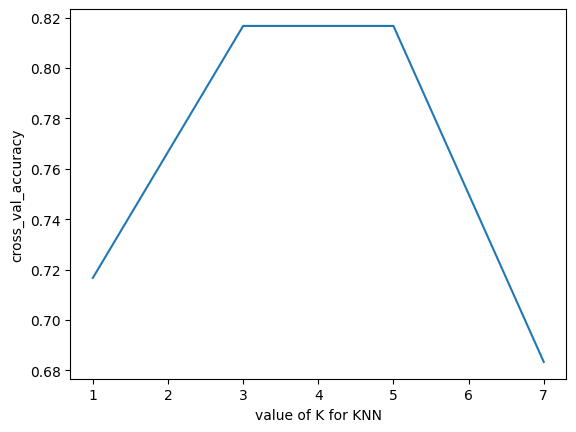

In [235]:
k_range = [1,3,5,7]
knns = [knn,knn1, knn2,knn3]
print(k_range)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y1, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('value of K for KNN')
plt.ylabel("cross_val_accuracy")
plt.show()


